# <center>Sparks Foudation Task 2<center>
## <div align="right">By:- Sneham Snehi</div>

## Task- Prediction using Unsupervised ML

### Topic- predict the optimum number of clusters and represent it visually

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
ir_data=pd.read_csv(r'D:\sparks\Iris.csv')
ir_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
ir_data.shape

(150, 6)

In [4]:
ir_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
ir_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
ir_data.Species = le.fit_transform(ir_data.Species)
x = ir_data.iloc[:, [1,2,3,4]].values
spec= ir_data.iloc[:,-1].values

### Applying Elbow method

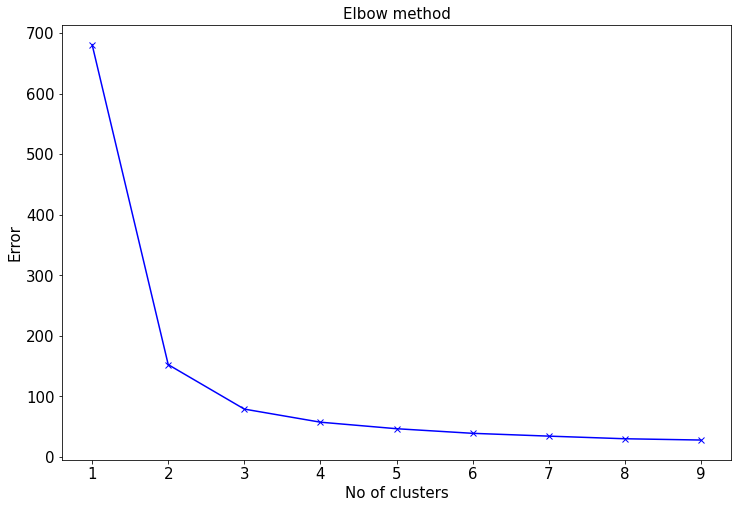

In [13]:
Error =[]
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
plt.figure(figsize=(12,8))
plt.plot(range(1, 10), Error,'bx-')
plt.title('Elbow method',fontsize=15)
plt.xlabel('No of clusters',fontsize=15)
plt.ylabel('Error',fontsize=15)
plt.show()

Here the value ok k should fall between 2 to 4. So, we are going to use k=3.

### Applying kmeans algorithm

In [8]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

kmeans3.cluster_centers_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

### Visualization of data

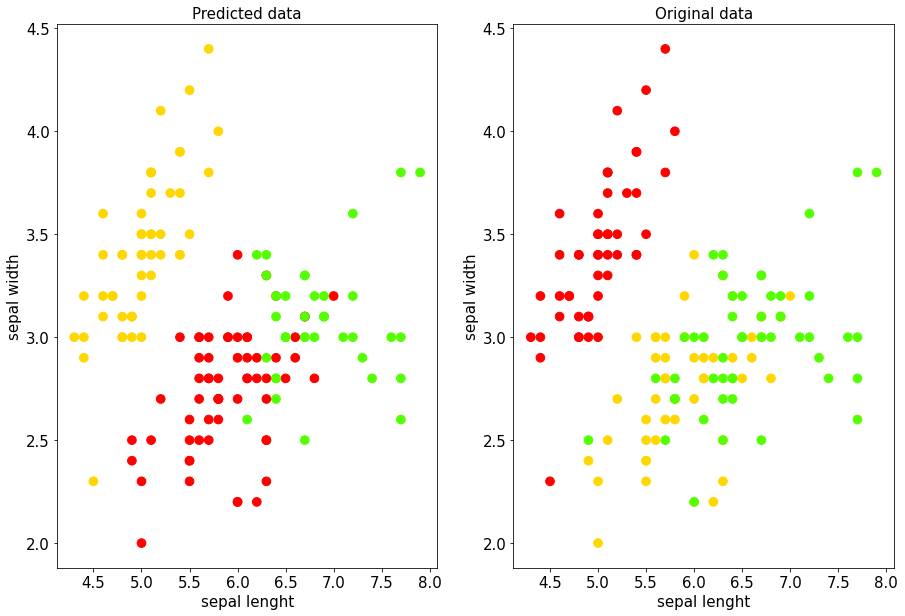

In [9]:
fig=plt.figure(figsize=(15,10))
sx1=fig.add_subplot(121)
sx2=fig.add_subplot(122)

sx1.scatter(x[:,0],x[:,1],c=y_kmeans3,cmap='prism',s=75)
sx2.scatter(x[:,0],x[:,1],c=spec,cmap='prism',s=75)

sx1.set_title('Predicted data',fontsize=15)
sx1.set_xlabel('sepal lenght',fontsize=15)
sx1.set_ylabel('sepal width',fontsize=15)

sx2.set_title('Original data',fontsize=15)
sx2.set_xlabel('sepal lenght',fontsize=15)
sx2.set_ylabel('sepal width',fontsize=15)

plt.show()

# <center>Thank You<center>